# Predict the percentage of an student based on the number of study hours using Scikit Learn.




# 

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#load the Data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head()
     

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


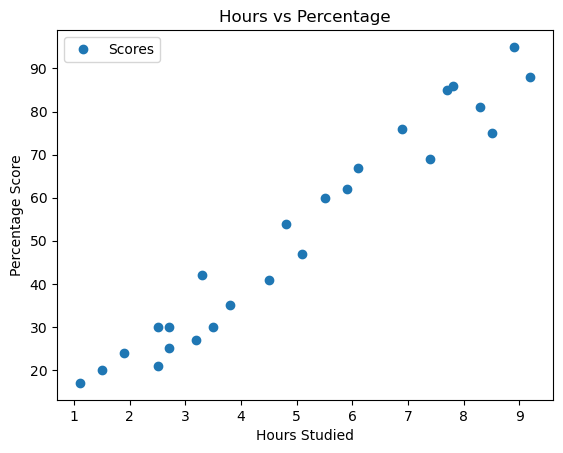

In [5]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


In [6]:
#divide the data into "attributes" (inputs) and "labels" (outputs)
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  


In [7]:
#split the data into training and test sets using Scikit-Learn's built-in train_test_split() method
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Time to train our Algorithm**

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


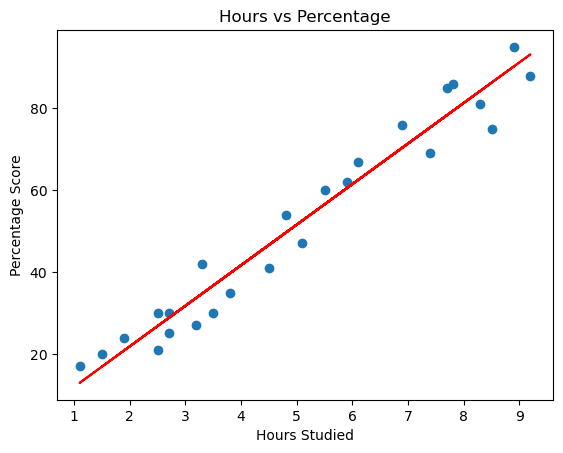

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line , color='red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [10]:
#making predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [13]:
# Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [14]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
# good fiting not over fit and not under fit 

0.9454906892105356